# OpenAI Function Calling


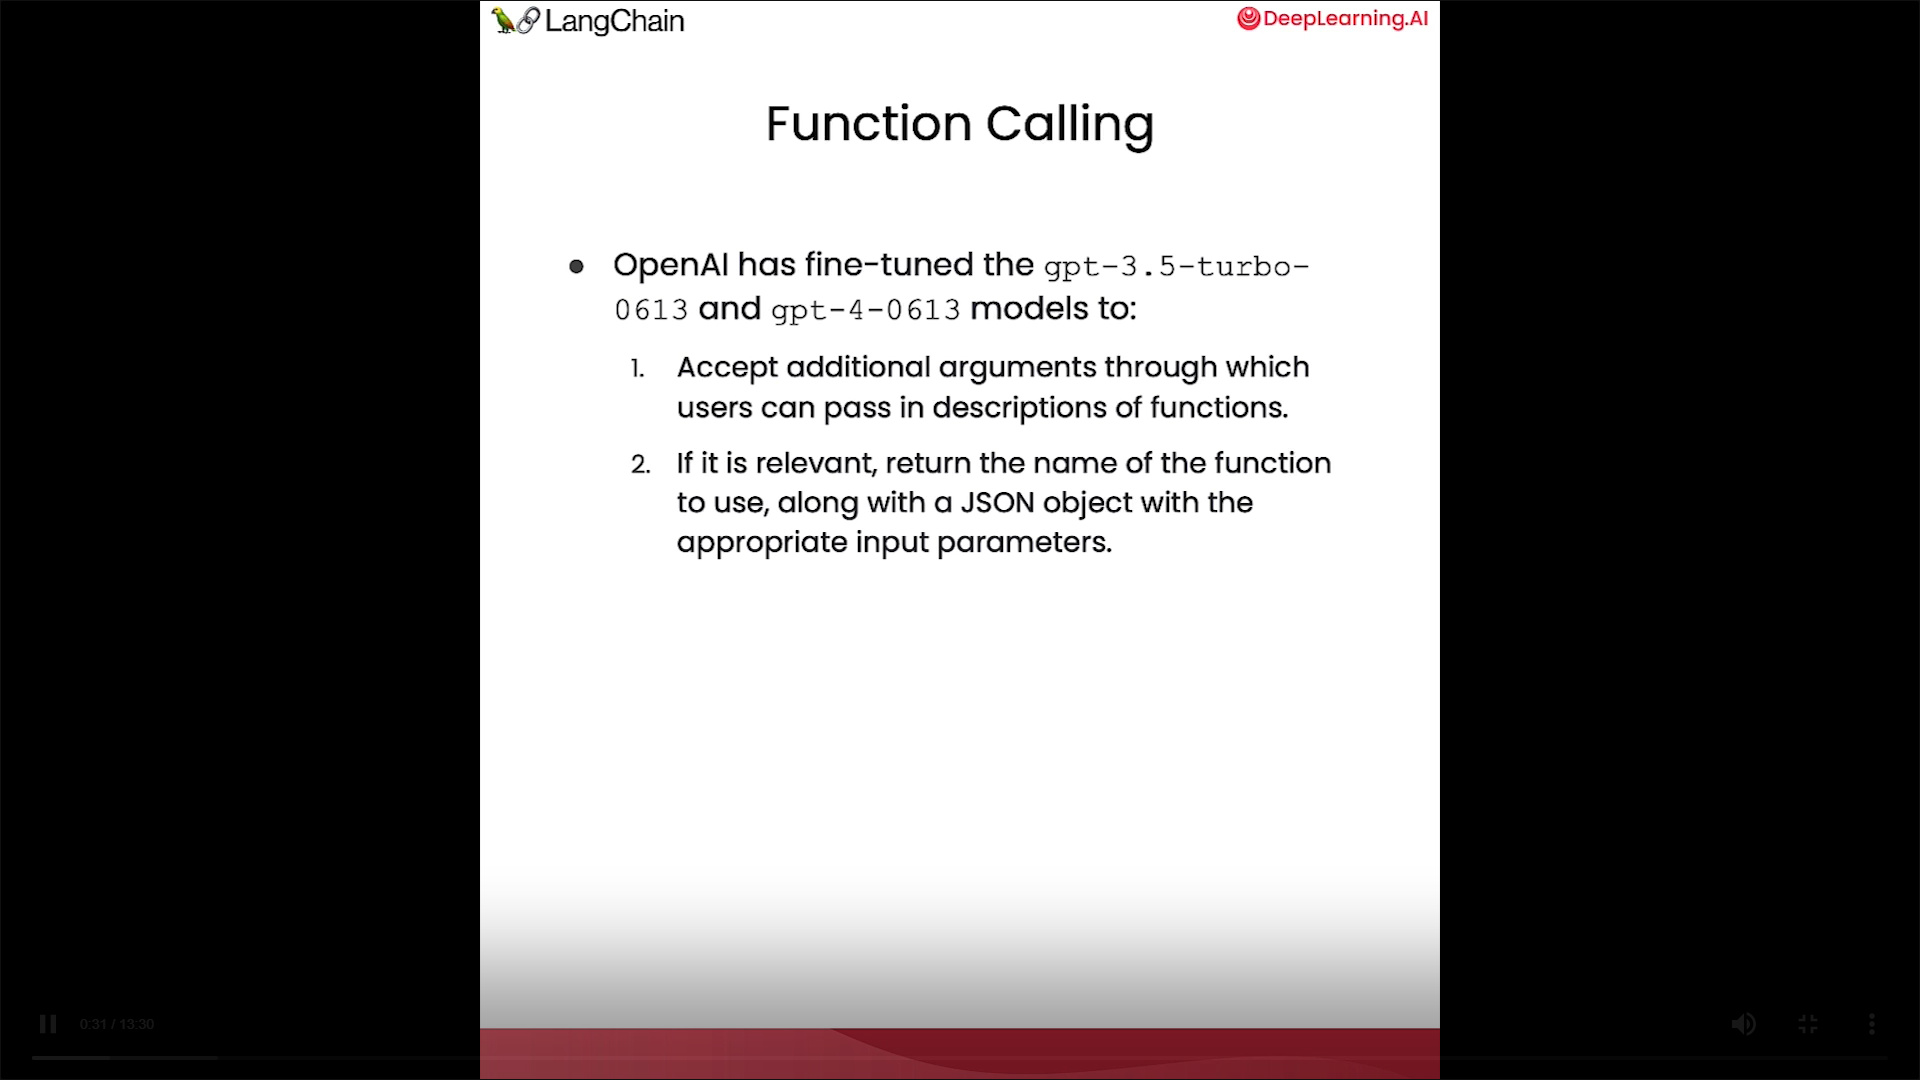

**Notes**:
- LLM's don't always produce the same results. The results you see in this notebook may differ from the results you see in the video.
- Notebooks results are temporary. Download the notebooks to your local machine if you wish to save your results.

In [1]:
import os
import openai

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
openai.api_key = os.environ['OPENAI_API_KEY']

In [2]:
import json

# Example dummy function hard coded to return the same weather
# In production, this could be your backend API or an external API
def get_current_weather(location, unit="fahrenheit"):
    """Get the current weather in a given location"""
    weather_info = {
        "location": location,
        "temperature": "72",
        "unit": unit,
        "forecast": ["sunny", "windy"],
    }
    return json.dumps(weather_info)

In [3]:
# define a function - Will have to pass this in llm
functions = [
    {
        "name": "get_current_weather",
        ## Language model will use this description to determine whether to call this function or not 
        "description": "Get the current weather in a given location",
        "parameters": {
            "type": "object",
            "properties": {
                "location": {
                    "type": "string",
                    "description": "The city and state, e.g. San Francisco, CA",
                },
                "unit": {"type": "string", "enum": ["celsius", "fahrenheit"]},
            },
            "required": ["location"],
        },
    }
]

In [4]:
messages = [
    {
        "role": "user",
        "content": "What's the weather like in Boston?"
    }
]

In [5]:
import openai

In [6]:
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo-0613",
    messages=messages,
    functions=functions
)

In [7]:
print(response) ## As you can null. And we can see value sin functioncall key.

{
  "id": "chatcmpl-8bLknEllotaFdvon9jkBGgQ5AiWkI",
  "object": "chat.completion",
  "created": 1703912449,
  "model": "gpt-3.5-turbo-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": null,
        "function_call": {
          "name": "get_current_weather",
          "arguments": "{\n  \"location\": \"Boston, MA\",\n  \"unit\": \"celsius\"\n}"
        }
      },
      "logprobs": null,
      "finish_reason": "function_call"
    }
  ],
  "usage": {
    "prompt_tokens": 82,
    "completion_tokens": 26,
    "total_tokens": 108
  },
  "system_fingerprint": null
}


In [8]:
response_message = response["choices"][0]["message"]

In [9]:
response_message

<OpenAIObject at 0x7f67b801cea0> JSON: {
  "role": "assistant",
  "content": null,
  "function_call": {
    "name": "get_current_weather",
    "arguments": "{\n  \"location\": \"Boston, MA\",\n  \"unit\": \"celsius\"\n}"
  }
}

In [12]:
response_message["content"]

In [13]:
response_message["function_call"]

<OpenAIObject at 0x7f67b801cef0> JSON: {
  "name": "get_current_weather",
  "arguments": "{\n  \"location\": \"Boston, MA\",\n  \"unit\": \"celsius\"\n}"
}

In [14]:
json.loads(response_message["function_call"]["arguments"])

{'location': 'Boston, MA', 'unit': 'celsius'}

In [15]:
args = json.loads(response_message["function_call"]["arguments"])

In [16]:
get_current_weather(args)

'{"location": {"location": "Boston, MA", "unit": "celsius"}, "temperature": "72", "unit": "fahrenheit", "forecast": ["sunny", "windy"]}'

In [17]:
messages = [
    {
        "role": "user",
        "content": "hi!",
    }
]

In [18]:
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo-0613",
    messages=messages,
    functions=functions,
)

In [19]:
print(response)

{
  "id": "chatcmpl-8bLoxouAnnLnf8UShTZ4wDDYgjQcd",
  "object": "chat.completion",
  "created": 1703912707,
  "model": "gpt-3.5-turbo-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "Hello! How can I assist you today?"
      },
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 76,
    "completion_tokens": 10,
    "total_tokens": 86
  },
  "system_fingerprint": null
}


In [20]:
messages = [
    {
        "role": "user",
        "content": "hi!",
    }
]
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo-0613",
    messages=messages,
    functions=functions,
    function_call="auto", ## LLLM will choose itself . Here it wont call function
)
print(response)

{
  "id": "chatcmpl-8bLp6Mq9aFYgGD8ypkWw00nTiFN3H",
  "object": "chat.completion",
  "created": 1703912716,
  "model": "gpt-3.5-turbo-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "Hello! How can I assist you today?"
      },
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 76,
    "completion_tokens": 10,
    "total_tokens": 86
  },
  "system_fingerprint": null
}


In [21]:
messages = [
    {
        "role": "user",
        "content": "hi!",
    }
]
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo-0613",
    messages=messages,
    functions=functions,
    function_call="none", ## here llm will not call llm function
)
print(response)

{
  "id": "chatcmpl-8bLpBnEHCffVS6E4YHob03ip68eiX",
  "object": "chat.completion",
  "created": 1703912721,
  "model": "gpt-3.5-turbo-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "Hello! How can I assist you today?"
      },
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 77,
    "completion_tokens": 9,
    "total_tokens": 86
  },
  "system_fingerprint": null
}


In [25]:
messages = [
    {
        "role": "user",
        "content": "What's the weather in Boston?",
    }
]
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo-0613",
    messages=messages,
    functions=functions,
    function_call="none", ## here we have passed none. But we asked question related to weather .But function wont be called because we have specicfied none
)
print(response)

{
  "id": "chatcmpl-8bLrqyKFbuLkqS7KlvAiufxi0ZJdq",
  "object": "chat.completion",
  "created": 1703912886,
  "model": "gpt-3.5-turbo-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "Please wait a moment while I check the current weather in Boston."
      },
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 82,
    "completion_tokens": 13,
    "total_tokens": 95
  },
  "system_fingerprint": null
}


In [27]:
messages = [
    {
        "role": "user",
        "content": "hi!",
    }
]
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo-0613",
    messages=messages,
    functions=functions,
    function_call={"name": "get_current_weather"}, ## Here we are forcing to call the fucnction
)
print(response)

{
  "id": "chatcmpl-8bLt3pj7Wu8ulzLuzaaBMxIru5BCO",
  "object": "chat.completion",
  "created": 1703912961,
  "model": "gpt-3.5-turbo-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": null,
        "function_call": {
          "name": "get_current_weather",
          "arguments": "{\n  \"location\": \"San Francisco, CA\"\n}"
        }
      },
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 83,
    "completion_tokens": 12,
    "total_tokens": 95
  },
  "system_fingerprint": null
}


In [28]:
messages = [
    {
        "role": "user",
        "content": "What's the weather like in Boston!",
    }
]
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo-0613",
    messages=messages,
    functions=functions,
    function_call={"name": "get_current_weather"},
)
print(response)

{
  "id": "chatcmpl-8bLtTbNYUVffswrzJcHvO8Ewdh4kT",
  "object": "chat.completion",
  "created": 1703912987,
  "model": "gpt-3.5-turbo-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": null,
        "function_call": {
          "name": "get_current_weather",
          "arguments": "{\n  \"location\": \"Boston, MA\"\n}"
        }
      },
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 89,
    "completion_tokens": 11,
    "total_tokens": 100
  },
  "system_fingerprint": null
}


In [29]:
messages.append(response["choices"][0]["message"])

In [30]:
args = json.loads(response["choices"][0]["message"]['function_call']['arguments'])
observation = get_current_weather(args)

In [31]:
messages.append(
        {
            "role": "function",
            "name": "get_current_weather",
            "content": observation,
        }
)

In [32]:
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo-0613",
    messages=messages,
)
print(response)

{
  "id": "chatcmpl-8bLtkrfKgUCKIHINyg2pvvNtn7kYo",
  "object": "chat.completion",
  "created": 1703913004,
  "model": "gpt-3.5-turbo-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "The current weather in Boston, MA is sunny and windy with a temperature of 72\u00b0F."
      },
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 77,
    "completion_tokens": 19,
    "total_tokens": 96
  },
  "system_fingerprint": null
}
